<a href="https://colab.research.google.com/github/subho99/PersonalProjects/blob/main/DepressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing and Importing Libraries

In [4]:
!pip install statsmodels

In [5]:
!pip install tensorflow

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical and Time Series Analysis
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Deep Learning (only if you plan to use LSTM models)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Utilities
from google.colab import files, drive
import os

# Dataset Loading and Preprocessing

In [9]:
# Load the dataset
file_path = '/content/depressive-disorders-prevalence-ihme.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Renaming columns for clarity
data.columns = ['Country', 'Code', 'Year', 'Depression_Prevalence']

# Dropping the first row if it's a duplicate of the header
data = data.drop(data.index[0])

# Convert 'Year' to an integer
data['Year'] = pd.to_numeric(data['Year'], errors='coerce').astype('Int64')

# Convert 'Depression_Prevalence' to a float
data['Depression_Prevalence'] = pd.to_numeric(data['Depression_Prevalence'], errors='coerce')

# Handling missing values
# If the 'Code' column is not critical, you can choose to drop it
data.drop(columns=['Code'], inplace=True)

# Check for any additional missing values in the dataset
missing_values = data.isnull().sum()

# Output the data types, missing values, and first few rows of the dataset for verification
print("Data Types:")
print(data.dtypes)
print("\nMissing Values:")
print(missing_values)
print("\nFirst Few Rows of the Dataset:")
print(data.head())

Data Types:
Country                   object
Year                       Int64
Depression_Prevalence    float64
dtype: object

Missing Values:
Country                  0
Year                     0
Depression_Prevalence    0
dtype: int64

First Few Rows of the Dataset:
       Country  Year  Depression_Prevalence
1  Afghanistan  1990               4.996118
2  Afghanistan  1991               4.989290
3  Afghanistan  1992               4.981346
4  Afghanistan  1993               4.976958
5  Afghanistan  1994               4.977782


# Exploratory Data Analysis

In [10]:
# Ensure the data types are correct
data['Year'] = pd.to_numeric(data['Year'], errors='coerce').fillna(0).astype(int)
data['Depression_Prevalence'] = pd.to_numeric(data['Depression_Prevalence'], errors='coerce')

# Drop rows with NaN values in these specific columns if any
data.dropna(subset=['Year', 'Depression_Prevalence'], inplace=True)

In [12]:
# EDA: Exploratory Data Analysis

# 1. Summary Statistics
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
              Year  Depression_Prevalence
count  6420.000000            6420.000000
mean   2004.500000               3.767036
std       8.656116               0.925286
min    1990.000000               1.522333
25%    1997.000000               3.080036
50%    2004.500000               3.636772
75%    2012.000000               4.366252
max    2019.000000               7.645899


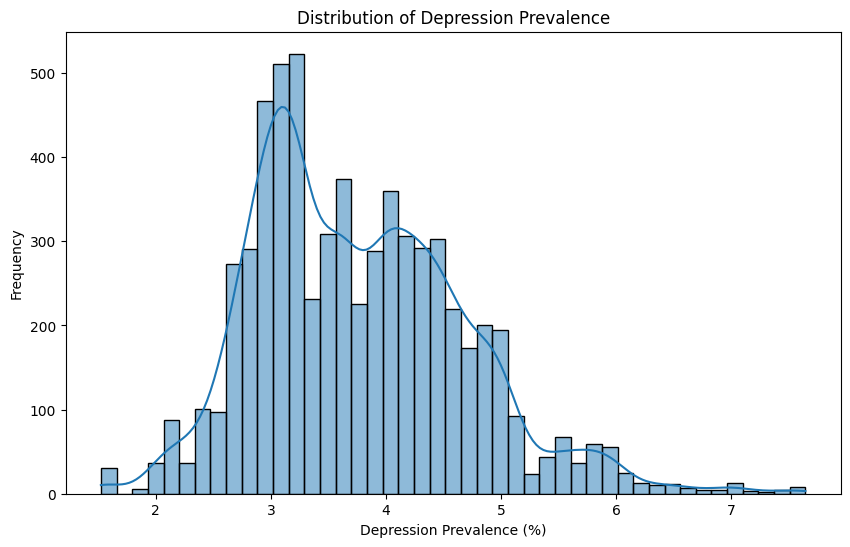

In [13]:
# 2. Distribution of Depression Prevalence
plt.figure(figsize=(10, 6))
sns.histplot(data['Depression_Prevalence'], kde=True)
plt.title('Distribution of Depression Prevalence')
plt.xlabel('Depression Prevalence (%)')
plt.ylabel('Frequency')
plt.show()

The histogram provided shows the distribution of depression prevalence percentages. Here are the inferences and conclusions that can be drawn from the plot:

### Inferences:

1. **Central Tendency**: The distribution has a clear central peak, suggesting that most of the prevalence rates fall around this central value. This indicates a common range of depression prevalence that might be considered typical across the observed countries or regions.

2. **Skewness**: The distribution appears to be right-skewed, meaning there are more countries on the lower end of depression prevalence and fewer countries with very high prevalence rates.

3. **Variability**: There is a wide range of prevalence rates, as indicated by the spread of the histogram bars, suggesting variability in depression rates across different populations.

4. **Outliers**: The long tail to the right suggests there might be outliers with unusually high depression prevalence rates.

### Conclusions:

1. **Most Common Prevalence Rates**: The bulk of the data clusters around the mode, which seems to be between 3% and 4%. This might be considered the average range for depression prevalence globally or within the dataset's context.

2. **High Prevalence Outliers**: The presence of a right skew indicates that while most countries have lower prevalence rates, there are a few countries with significantly higher rates. These may warrant further investigation to understand the contributing factors.

3. **Public Health Focus**: The range of prevalence rates suggests that mental health strategies may need to be tailored to specific country needs. Countries on the higher end of the spectrum might require more resources or targeted interventions.

4. **Data Quality and Reporting**: The skewness and outliers could also reflect differences in data collection methods, diagnostic criteria, or reporting standards across countries.

5. **Policy Implications**: For global health policy, understanding the factors that contribute to the lower prevalence rates could be key to formulating effective mental health strategies. Additionally, the right-skewed distribution suggests that a significant proportion of the global population resides in countries with below-average depression rates, which might be indicative of protective social, economic, or health factors at play.

It's important to note that these conclusions are based on the visual interpretation of the histogram. A deeper statistical analysis would be required to confirm these observations and to understand the underlying causes of the distribution's shape. Moreover, qualitative data might be needed to provide context to these quantitative findings, especially when addressing the reasons behind high prevalence rates in certain countries.

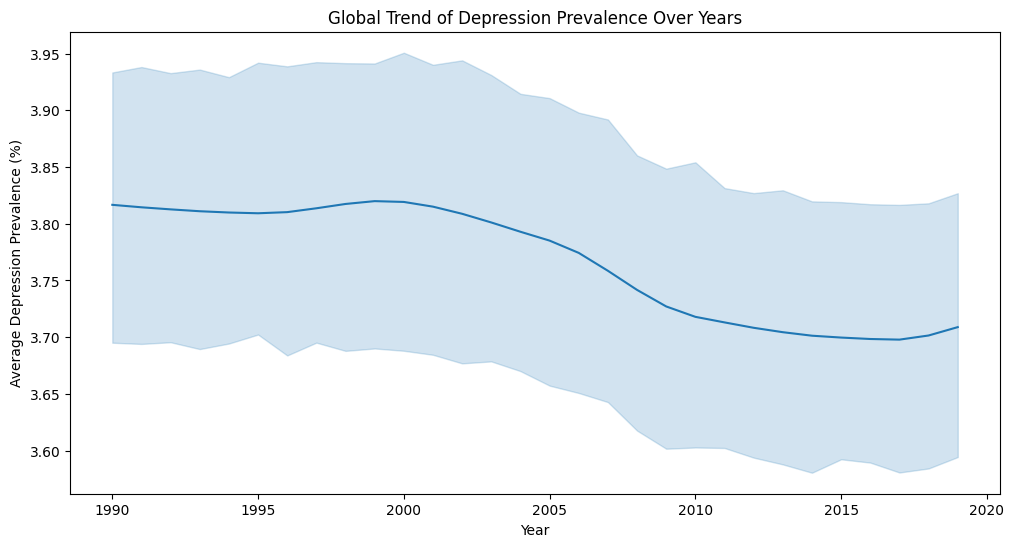

In [14]:
# 3. Trend of Depression Prevalence Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Depression_Prevalence', data=data, estimator='mean')
plt.title('Global Trend of Depression Prevalence Over Years')
plt.xlabel('Year')
plt.ylabel('Average Depression Prevalence (%)')
plt.show()

The line plot with a shaded confidence interval shows the trend of average depression prevalence globally over a span of approximately three decades. Here are the inferences and conclusions that can be drawn from the visualization:

### Inferences:

1. **Overall Decline**: There is a general declining trend in depression prevalence from the mid-1990s to around 2020, indicating a decrease in the average global rates of depression.

2. **Periods of Stability and Change**: The trend appears to be relatively stable in the early 1990s, followed by a more pronounced decline that begins in the late 1990s and continues until about 2015. After that, the decline slows, and the trend flattens out.

3. **Confidence Interval Width**: The shaded area representing the confidence interval is relatively uniform in width throughout the years, suggesting consistent variability around the mean estimate of depression prevalence.

### Conclusions:

1. **Improvements in Global Mental Health**: The decrease in average depression prevalence could reflect improvements in mental health outcomes globally, possibly due to better awareness, destigmatization, and more effective treatment options available over these decades.

2. **Potential Impacts of Global Events**: The decline may also be influenced by global events, economic conditions, and public health initiatives that have taken place during this period.

3. **Stabilization of Prevalence Rates**: The leveling off of the trend in recent years may suggest that the factors contributing to the decline in depression prevalence have reached a state of equilibrium or that new factors have emerged to slow or halt the decline.

4. **Consistency in Variability**: The consistent width of the confidence interval implies that while the mean global prevalence has changed, the variability of the prevalence rates around the mean has remained fairly constant.

5. **Consideration of Underlying Factors**: To understand the reasons behind the declining trend and the recent stabilization, it would be important to consider a range of factors including health policy changes, economic development, social changes, and improvements in healthcare systems across different countries.

6. **Implications for Future Policy**: The observed trends underscore the importance of sustained and adaptable mental health policies, as well as continued investment in mental health services and research.

7. **Need for Continued Monitoring**: The recent flattening of the trend highlights the need for continued monitoring and research to understand the current state of global mental health and to address any new challenges that may be emerging.

It's important to note that trends in prevalence rates can be influenced by many factors, including changes in diagnostic criteria, reporting practices, and access to healthcare. Additionally, this plot does not explain causality, and further analysis would be needed to draw more definitive conclusions about the factors influencing global depression prevalence.

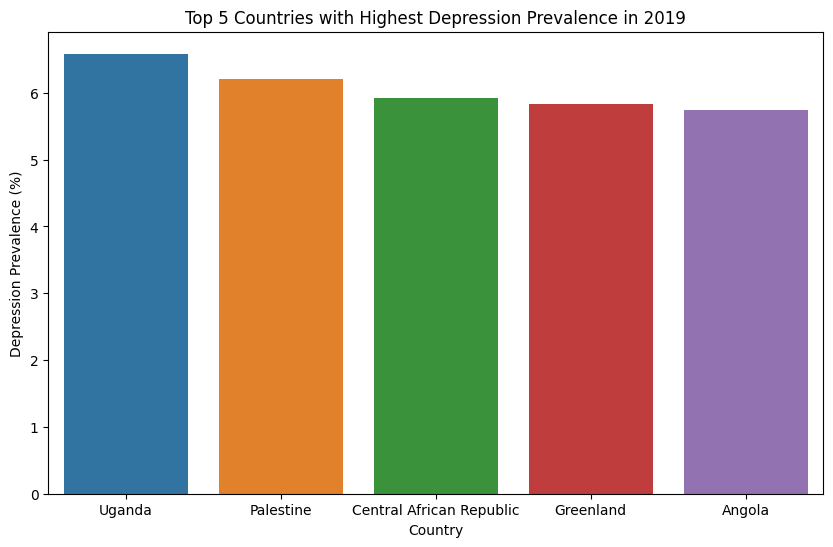

In [15]:
# 4. Top 5 Countries with Highest Depression Prevalence in the Latest Year
latest_year = data['Year'].max()
top_countries = data[data['Year'] == latest_year].nlargest(5, 'Depression_Prevalence')

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Depression_Prevalence', data=top_countries)
plt.title(f'Top 5 Countries with Highest Depression Prevalence in {latest_year}')
plt.xlabel('Country')
plt.ylabel('Depression Prevalence (%)')
plt.show()

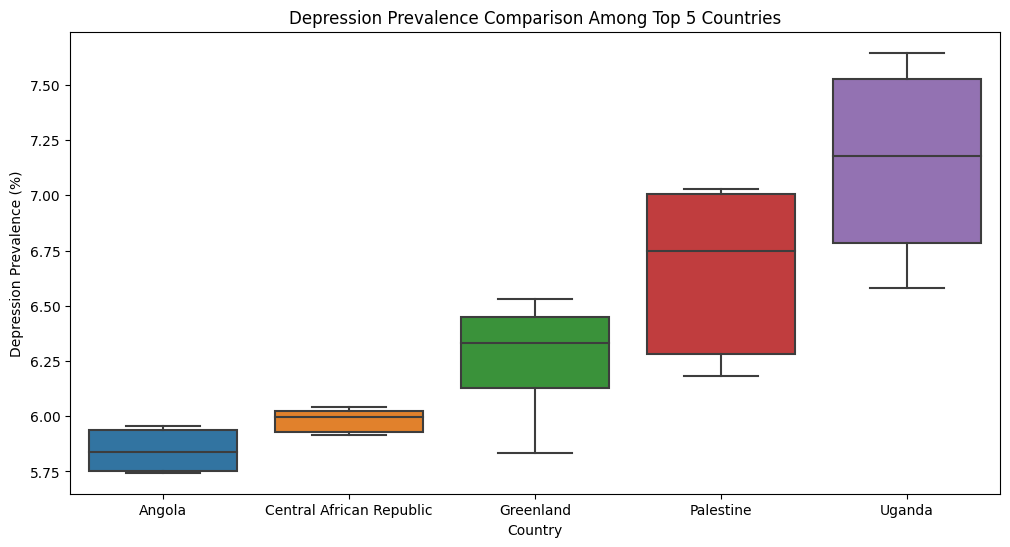

In [16]:
# 5. Boxplot of Depression Prevalence for Top 5 Countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Depression_Prevalence', data=data[data['Country'].isin(top_countries['Country'])])
plt.title('Depression Prevalence Comparison Among Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Depression Prevalence (%)')
plt.show()

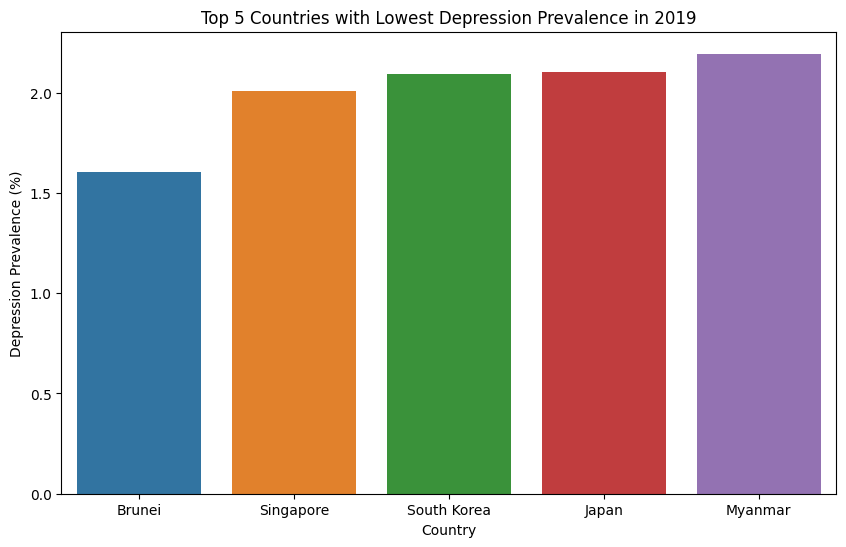

In [17]:
# 6. Bottom 5 Countries with Lowest Depression Prevalence
bottom_countries = data[data['Year'] == latest_year].nsmallest(5, 'Depression_Prevalence')

plt.figure(figsize=(10, 6))
sns.barplot(x='Country', y='Depression_Prevalence', data=bottom_countries)
plt.title(f'Top 5 Countries with Lowest Depression Prevalence in {latest_year}')
plt.xlabel('Country')
plt.ylabel('Depression Prevalence (%)')
plt.show()

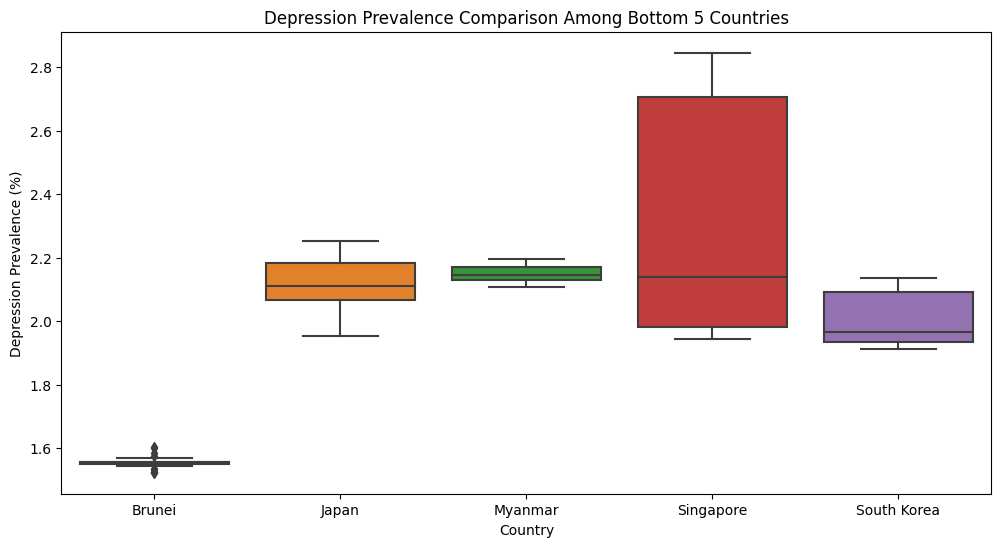

In [18]:
# 7. Boxplot of Depression Prevalence for Bottom 5 Countries
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Depression_Prevalence', data=data[data['Country'].isin(bottom_countries['Country'])])
plt.title('Depression Prevalence Comparison Among Bottom 5 Countries')
plt.xlabel('Country')
plt.ylabel('Depression Prevalence (%)')
plt.show()

# Depression Data Analysis - Global Data

<ipython-input-19-3a2346bffff1>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Depression_Prevalence', data=data, estimator='mean', ci=None)


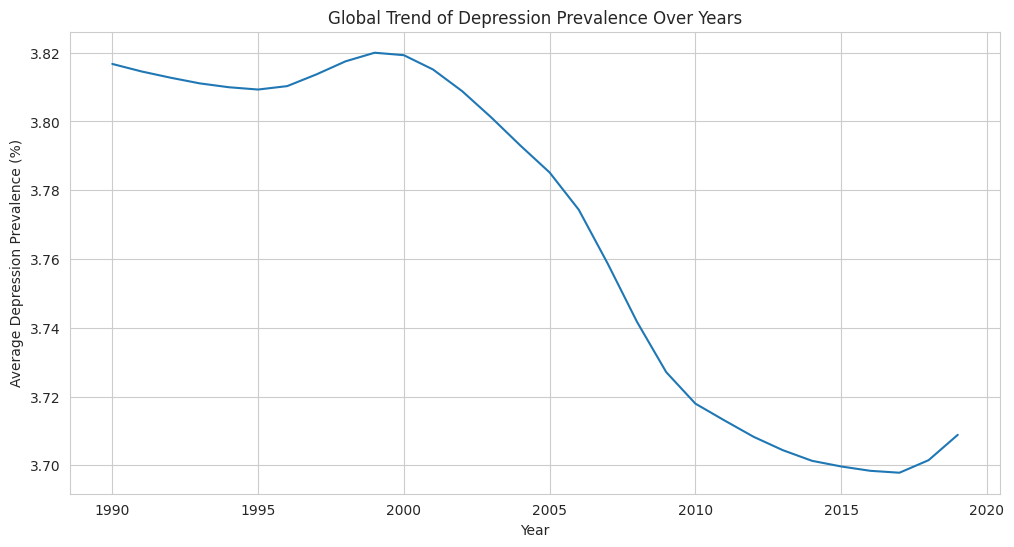

In [19]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Global Trend of Depression Prevalence Over Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Depression_Prevalence', data=data, estimator='mean', ci=None)
plt.title('Global Trend of Depression Prevalence Over Years')
plt.xlabel('Year')
plt.ylabel('Average Depression Prevalence (%)')
plt.show()

### Inferences:

1. **Stability and Decline**: The prevalence of depression was relatively stable from 1990 until the early 2000s, with slight fluctuations.

2. **Significant Decrease**: There is a noticeable and significant decrease in depression prevalence starting from the early 2000s, continuing until around 2015.

3. **Rebound**: After reaching a low around 2015, the prevalence of depression shows a rebound, with a slight increase noted towards 2020.

### Conclusions:

1. **Early Period Stability**: The stability in the depression prevalence rates in the initial period might suggest that during these years, global factors affecting depression did not undergo significant changes, or that increases and decreases in different regions offset each other.

2. **Mid-Period Decrease**: The marked decrease in depression prevalence from the early 2000s to around 2015 could be attributed to several factors:
   - Improved global health initiatives and awareness about mental health.
   - Better access to treatment and support for mental health issues.
   - Economic growth and stability in many parts of the world, potentially leading to improved general well-being.

3. **Recent Increase**: The recent uptick in depression prevalence towards 2020 might indicate new or resurgent challenges:
   - Economic downturns, social unrest, or global events such as the COVID-19 pandemic might have contributed to this increase.
   - It may also reflect changes in diagnostic criteria, reporting practices, or an actual increase in the mental health burden.

4. **Public Health Implications**: The overall decrease in depression prevalence over several years suggests effective interventions but the recent increase indicates a need for renewed focus on mental health policies, preventive measures, and treatment accessibility.

5. **Future Research and Policy**: The trends observed call for in-depth analysis to understand the underlying causes. Policymakers might investigate the factors that led to the decrease and address the reasons for the recent increase, ensuring that strategies are adaptable to changing global conditions.

It's important to note that these conclusions are speculative and would require further investigation to confirm. Data from additional sources should be considered to understand the context and factors influencing these trends. Moreover, the increase observed at the end might be influenced by the tail end of data collection or changes in the methodology, which should be verified with the source of the data.

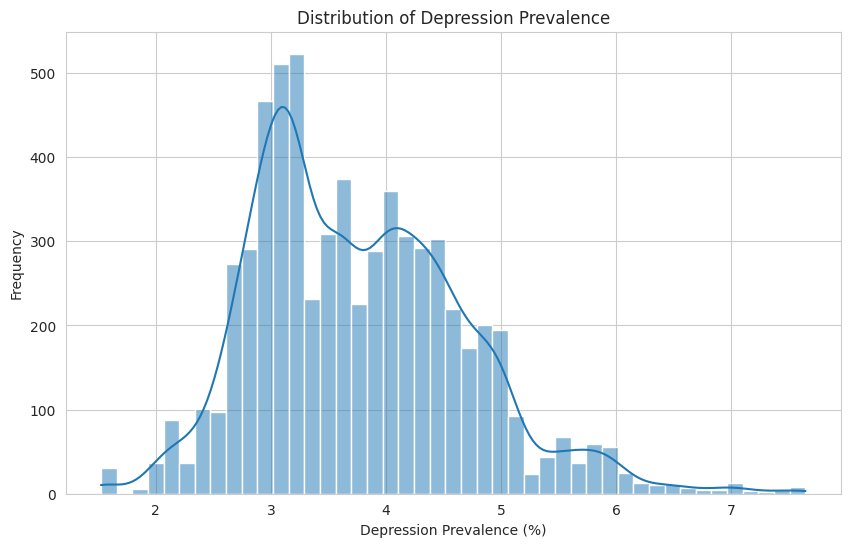

In [20]:
# Distribution of Depression Prevalence
plt.figure(figsize=(10, 6))
sns.histplot(data['Depression_Prevalence'], kde=True)
plt.title('Distribution of Depression Prevalence')
plt.xlabel('Depression Prevalence (%)')
plt.ylabel('Frequency')
plt.show()

The histogram provided shows the distribution of depression prevalence percentages. Here are the inferences and conclusions that can be drawn from the plot:

### Inferences:

1. **Central Tendency**: The distribution has a clear central peak, suggesting that most of the prevalence rates fall around this central value. This indicates a common range of depression prevalence that might be considered typical across the observed countries or regions.

2. **Skewness**: The distribution appears to be right-skewed, meaning there are more countries on the lower end of depression prevalence and fewer countries with very high prevalence rates.

3. **Variability**: There is a wide range of prevalence rates, as indicated by the spread of the histogram bars, suggesting variability in depression rates across different populations.

4. **Outliers**: The long tail to the right suggests there might be outliers with unusually high depression prevalence rates.

### Conclusions:

1. **Most Common Prevalence Rates**: The bulk of the data clusters around the mode, which seems to be between 3% and 4%. This might be considered the average range for depression prevalence globally or within the dataset's context.

2. **High Prevalence Outliers**: The presence of a right skew indicates that while most countries have lower prevalence rates, there are a few countries with significantly higher rates. These may warrant further investigation to understand the contributing factors.

3. **Public Health Focus**: The range of prevalence rates suggests that mental health strategies may need to be tailored to specific country needs. Countries on the higher end of the spectrum might require more resources or targeted interventions.

4. **Data Quality and Reporting**: The skewness and outliers could also reflect differences in data collection methods, diagnostic criteria, or reporting standards across countries.

5. **Policy Implications**: For global health policy, understanding the factors that contribute to the lower prevalence rates could be key to formulating effective mental health strategies. Additionally, the right-skewed distribution suggests that a significant proportion of the global population resides in countries with below-average depression rates, which might be indicative of protective social, economic, or health factors at play.

It's important to note that these conclusions are based on the visual interpretation of the histogram. A deeper statistical analysis would be required to confirm these observations and to understand the underlying causes of the distribution's shape. Moreover, qualitative data might be needed to provide context to these quantitative findings, especially when addressing the reasons behind high prevalence rates in certain countries.

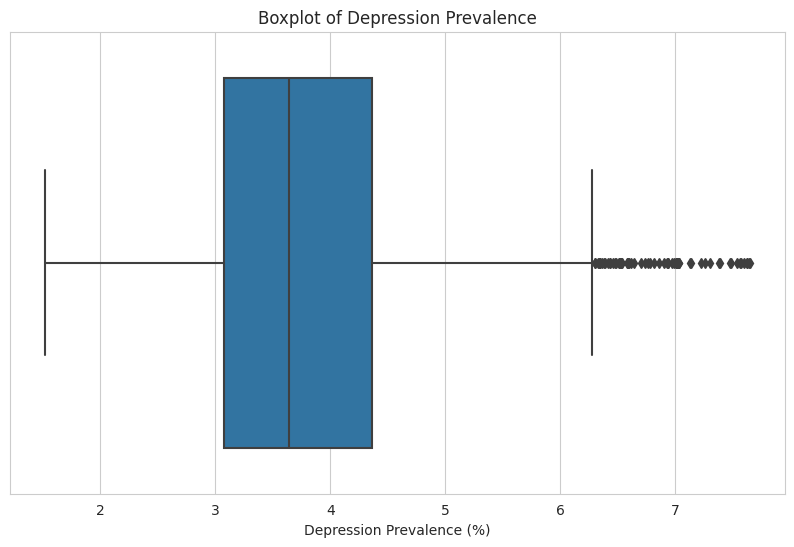

In [21]:
# Boxplot to Observe Outliers and Distribution Range
plt.figure(figsize=(10, 6))
sns.boxplot(x='Depression_Prevalence', data=data)
plt.title('Boxplot of Depression Prevalence')
plt.xlabel('Depression Prevalence (%)')
plt.show()

The boxplot provided visualizes the distribution of depression prevalence rates. From this boxplot, we can derive the following inferences and conclusions:

### Inferences:

1. **Central Tendency and Spread**: The box represents the interquartile range (IQR), showing the middle 50% of the data. The line in the box indicates the median depression prevalence. The box's position suggests that the median prevalence rate is below 4%, and most countries have a prevalence rate between approximately 3% and 4.5%.

2. **Outliers**: The points beyond the whiskers represent outliers. These are countries with depression prevalence rates that are unusually high compared to the rest of the data.

3. **Variability**: The range of the whiskers shows the spread of the bulk of the data, excluding outliers. The range of the data is fairly narrow, indicating that the depression prevalence rates do not vary wildly for most countries.

4. **Skewness**: Given that the median line is closer to the bottom of the box and there are several outliers above the upper whisker, the distribution appears to be slightly right-skewed.

### Conclusions:

1. **Typical Prevalence Rates**: Most countries have a depression prevalence rate that falls in a relatively narrow range, with a median value below 4%. This suggests a commonality in depression rates across different countries.

2. **High Prevalence Concerns**: The presence of outliers indicates that there are countries with significantly higher rates of depression prevalence, which could be a concern for public health officials and may warrant further investigation into the underlying causes.

3. **Potential for Targeted Interventions**: The data suggests that while the median prevalence rate is moderate, countries represented by the outliers may benefit from targeted mental health interventions and policy support.

4. **Need for Robust Mental Health Infrastructure**: The outliers also underscore the need for robust mental health infrastructure and resources in countries with higher prevalence rates to address the disproportionate burden of depression.

5. **Global Health Initiatives**: The relatively narrow IQR suggests that global health initiatives and standards may be contributing to a convergence in depression rates, but the efforts must be sustained or increased to address the higher rates indicated by the outliers.

It's important to note that a boxplot provides a snapshot of the distribution but does not explain why the distribution is the way it is. Further analysis would be required to understand the socio-economic, environmental, and healthcare factors that contribute to the observed distribution of depression prevalence rates. Additionally, examining the specific countries corresponding to the outliers could provide insights into unique national circumstances affecting mental health.

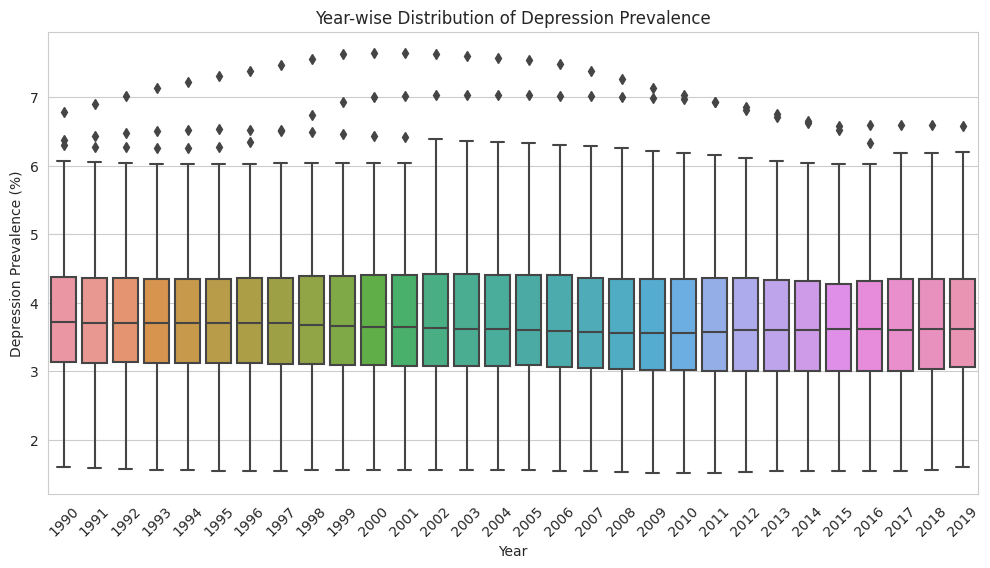

In [22]:
# Checking for Any Year-Wise Outliers or Anomalies
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Depression_Prevalence', data=data)
plt.title('Year-wise Distribution of Depression Prevalence')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Depression Prevalence (%)')
plt.show()

Based on the year-wise boxplot you've provided, which appears to show the distribution of depression prevalence rates over multiple years, we can infer the following:

### Inferences:

1. **Stable Medians**: The median values of depression prevalence, indicated by the line within the boxes, appear relatively stable over the years, suggesting consistent median prevalence rates across time.

2. **Interannual Variability**: The height of the boxes, representing the interquartile range (IQR), shows some variability from year to year. This could indicate changes in the spread of prevalence rates.

3. **Outliers**: There are several outliers in many years, both on the lower and higher ends. These outliers suggest that there are countries with depression prevalence rates that significantly deviate from the median each year.

4. **No Clear Trend in Spread**: There does not seem to be a clear trend in the spread of the data over the years, as the IQRs are inconsistent in size.

### Conclusions:

1. **Consistent Median Prevalence**: The consistent median values imply that the central tendency of depression prevalence rates has not seen dramatic changes over the years on a global scale.

2. **Variations in Spread**: The variations in IQR suggest that the disparity between countries with lower and higher prevalence rates changes from year to year, which could be due to various factors including economic conditions, policy changes, or health crises.

3. **Potential for In-Depth Analysis of Outliers**: The presence of outliers every year warrants further investigation into specific countries that consistently fall outside the typical range. These could be countries that are either particularly successful in managing depression or those that are struggling significantly.

4. **Implications for Global Health Strategies**: The lack of a clear trend in the spread and the presence of outliers indicate the need for tailored mental health strategies that consider the unique circumstances of different countries.

5. **Further Research Needed**: The variation in prevalence rates and the presence of outliers highlight the need for further research to understand the socio-economic and healthcare factors that contribute to these patterns.

These conclusions suggest a relatively stable global situation with regard to the median prevalence of depression, but with noteworthy deviations in certain countries or years. Understanding the reasons behind the outliers and variations could be key to improving global mental health outcomes.

# Country Comparative Data Analysis

In [ ]:
# Comparative Country Analysis

# 1. Selecting a subset of countries for detailed comparison
# You can modify this list based on the countries you are interested in
selected_countries = ['United States', 'Canada', 'United Kingdom', 'India', 'China', 'Germany', 'Brazil', 'Japan', 'Australia', 'South Africa']

# Filtering data for the selected countries
filtered_data = data[data['Country'].isin(selected_countries)]

<ipython-input-24-bbb9de54994d>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Year', y='Depression_Prevalence', hue='Country', data=filtered_data, ci=None)


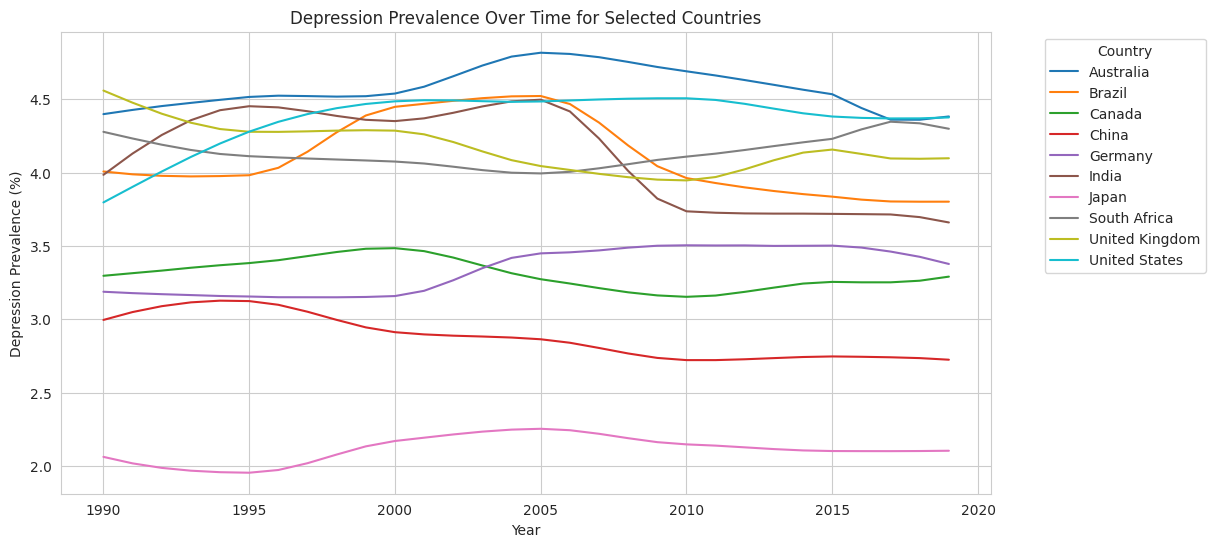

In [24]:
# 2. Time Series Plot for Selected Countries
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Depression_Prevalence', hue='Country', data=filtered_data, ci=None)
plt.title('Depression Prevalence Over Time for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Depression Prevalence (%)')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The line plot shows the time series of depression prevalence rates for selected countries over a period of approximately three decades. Based on the visual information from this plot, we can draw the following inferences and conclusions:

### Inferences:

1. **Diverse Trends**: Different countries exhibit various trends in depression prevalence over time, suggesting that the factors influencing these rates are complex and multifaceted.

2. **Country-Specific Patterns**: Some countries show an increase, others a decrease, and yet others relatively stable rates over the observed period. For example, one country appears to show a consistent increase over time, while another shows a significant decrease, especially after 2010.

3. **Comparative Rates**: At any given time point, there is considerable variation among countries in terms of depression prevalence. Some countries consistently have higher rates throughout the period, while others maintain lower rates.

4. **Crossing Trajectories**: The crossing lines for some countries suggest changes in relative standings, indicating that some countries may have improved or worsened in their depression prevalence relative to others.

### Conclusions:

1. **Healthcare and Policy Implications**: The differing trajectories imply that national healthcare systems and mental health policies may have differential impacts on the prevalence of depression. These impacts could be assessed by correlating healthcare quality and access data with the trends seen here.

2. **Socioeconomic Factors**: Socioeconomic factors such as economic growth, unemployment rates, social inequality, and life events could play a role in the varying trends and would be worthwhile to investigate further.

3. **Cultural and Reporting Differences**: Cultural attitudes towards mental health and depression, as well as differences in reporting standards and diagnostic practices, might contribute to the observed disparities among countries.

4. **Global and Local Crises**: Significant deviations in trends for certain countries could be associated with local or global crises, such as financial recessions, wars, or pandemics, affecting mental health on a broad scale.

5. **Need for Country-Specific Interventions**: The variation in prevalence suggests that a one-size-fits-all approach to mental health may not be effective. Instead, tailored strategies that consider each country's unique context, resources, and needs are essential.

6. **Research Opportunities**: The intersections and divergences in the trends provide opportunities for cross-national research to understand the effectiveness of different interventions and policies.

It's important to validate these inferences and conclusions with additional data and contextual information. Moreover, careful statistical analysis would be necessary to understand the significance and causality of the observed patterns. The conclusions drawn from this visual analysis provide a starting point for deeper investigation into the determinants of mental health across different national contexts.

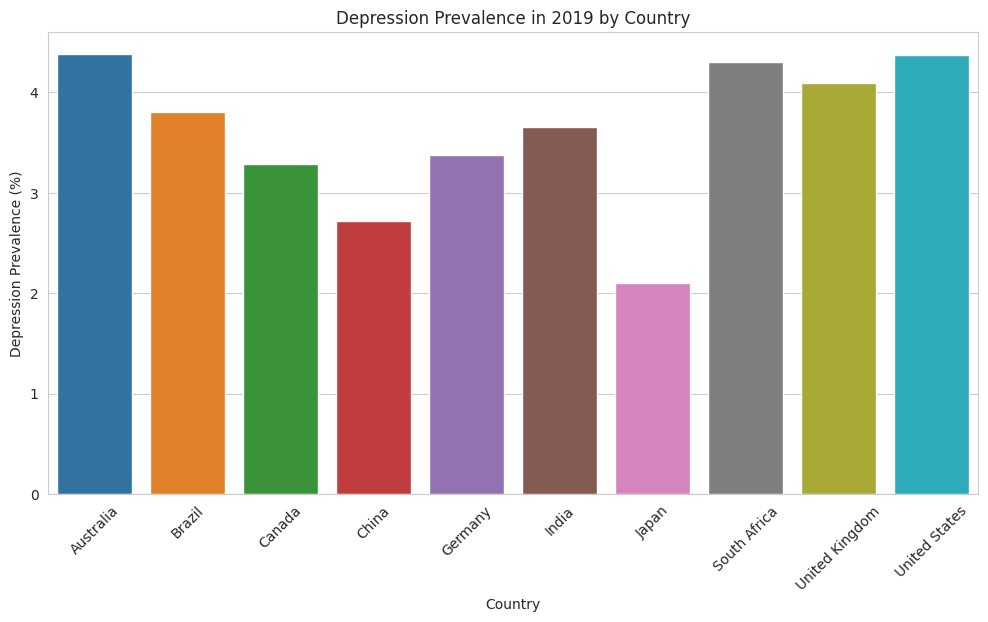

In [25]:
# 3. Comparative Bar Chart for the Latest Year in the Dataset
latest_year = data['Year'].max()
latest_data = filtered_data[filtered_data['Year'] == latest_year]

plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Depression_Prevalence', data=latest_data)
plt.title(f'Depression Prevalence in {latest_year} by Country')
plt.xlabel('Country')
plt.ylabel('Depression Prevalence (%)')
plt.xticks(rotation=45)
plt.show()

The bar chart shows the depression prevalence rates for different countries in the year 2019. Based on the visual data from this chart, we can derive the following inferences and conclusions:

### Inferences:

1. **Range of Prevalence**: There is a noticeable range in the prevalence of depression across different countries, with some countries having higher rates than others.

2. **Country-Specific Rates**: Each country exhibits a unique depression prevalence rate, suggesting that geographical or cultural factors might play a significant role in mental health outcomes.

3. **Comparative Analysis**: The chart allows for a direct comparison between the countries. For instance, the United States and Australia appear to have the highest rates among the displayed countries, while Japan has the lowest.

### Conclusions:

1. **Variability in Mental Health Status**: The variability in depression prevalence suggests differences in mental health status across these countries, which could be due to various factors including economic conditions, healthcare system effectiveness, social support structures, and cultural attitudes towards mental health.

2. **Healthcare Policy Impact**: The differences in prevalence rates might reflect the impact of national policies on mental health, access to mental health care, and the effectiveness of prevention and treatment programs.

3. **Socioeconomic and Cultural Factors**: Socioeconomic factors, such as income levels, unemployment rates, or social inequality, alongside cultural factors like stigma around mental health, may influence these rates.

4. **Need for Tailored Interventions**: The disparity in prevalence rates underscores the importance of tailored mental health interventions that are sensitive to the cultural and socioeconomic context of each country.

5. **Global Mental Health Prioritization**: Countries with higher prevalence rates might require more urgent attention and resources to address mental health issues. There could be a need for global health initiatives to target countries with elevated prevalence rates.

6. **Potential for International Learning**: Countries with lower prevalence rates may provide valuable insights into effective strategies for managing and reducing the impact of depression, which could be shared internationally.

It's important to remember that this is a snapshot for one year only. Longitudinal data would be needed to understand trends over time and to draw more robust conclusions about the progression and management of depression prevalence in these countries. Additionally, these conclusions should be supported by further research into the specific context and mental health infrastructure of each country.

<ipython-input-26-129f7133f4af>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = data.pivot("Country", "Year", "Depression_Prevalence")


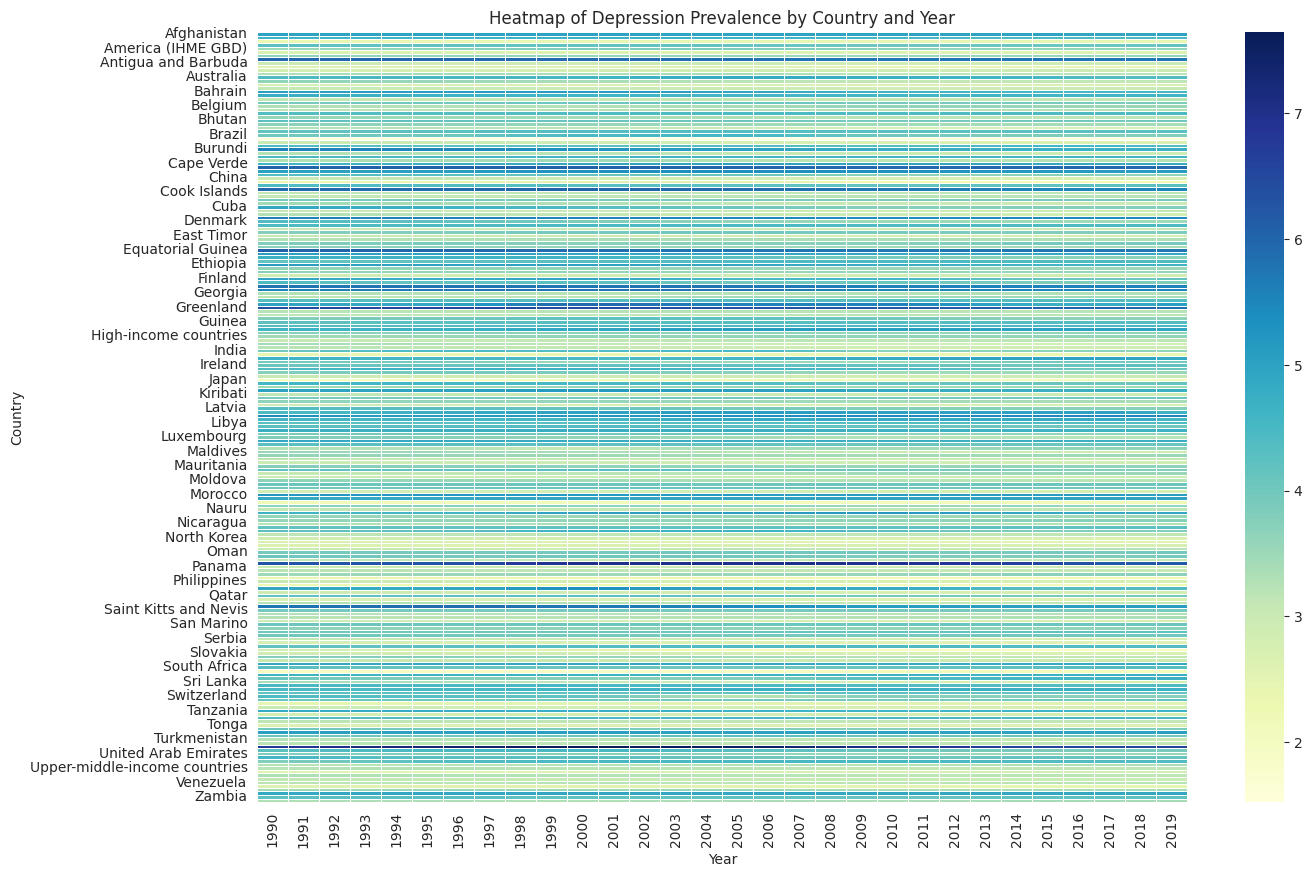

In [26]:
# 4. Heatmap for a Global View (Optional)
# This step requires pivoting the data to create a suitable format for a heatmap
pivot_data = data.pivot("Country", "Year", "Depression_Prevalence")
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data, cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Depression Prevalence by Country and Year')
plt.show()

The heatmap appears to visualize the prevalence of depression by country and year. The color intensity in the heatmap usually represents the magnitude of depression prevalence, with darker colors typically indicating higher rates. Based on the visual information from this heatmap, we can infer and conclude the following:

### Inferences:

1. **Prevalence Variation Over Time**: The color changes across the horizontal lines indicate that for many countries, depression prevalence rates change over time. Some countries show darker bands in certain years, indicating higher rates during those times.

2. **Country-Specific Patterns**: The variation in color intensity among different countries suggests that depression prevalence is not uniform across countries. Some countries consistently show lighter or darker shades, indicating lower or higher rates, respectively.

3. **Temporal Trends**: Some vertical bands of color change could indicate global trends affecting multiple countries simultaneously. For example, if there's a year where many countries show a darker color, it could indicate a global event impacting mental health.

### Conclusions:

1. **Diverse Global Impact**: The diversity in prevalence rates among countries emphasizes the varied impact of depression globally, potentially influenced by a multitude of factors, such as economic conditions, health policies, and social issues.

2. **Dynamic Changes in Mental Health**: The changes in prevalence rates over time for certain countries may reflect the dynamic nature of mental health, which could be affected by internal policy changes, public health initiatives, or socioeconomic shifts.

3. **Potential for Global Phenomena Influence**: If certain years show widespread increases or decreases in prevalence rates across many countries, this could suggest the influence of global phenomena, such as economic crises, pandemics, or major policy shifts in mental health.

4. **Need for Contextual Analysis**: The heatmap underscores the need to analyze the contextual factors behind the prevalence rates in each country, such as healthcare infrastructure, cultural attitudes towards mental health, and the availability of support services.

5. **Healthcare Strategy Implications**: For international health organizations and policymakers, the patterns observed could inform strategies to target mental health support where it's needed most and during times when prevalence rates spike.

6. **Research Opportunities**: The trends and patterns observed in the heatmap offer numerous opportunities for cross-national and longitudinal research into the factors affecting mental health across different populations and over time.

It's important to validate these conclusions with further statistical analysis and to consider additional data sources to understand the underlying causes of the observed patterns fully. The heatmap provides a visual summary but does not explain why certain countries or years have higher or lower depression prevalence rates. Further in-depth analysis would be required to draw more robust conclusions.